<a href="https://colab.research.google.com/github/krizz-byte/Kristianto.github.io/blob/main/Employee_Retention_(EB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets
!pip install pca

# DATASETS

set for analyst informasitian retention employee and otehr Employee Benefit information


In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mexwell/employee-performance-and-productivity-data?select=Extended_Employee_Performance_and_Productivity_Data.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kris
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mexwell/employee-performance-and-productivity-data


100%|██████████| 2.39M/2.39M [00:00<00:00, 24.1MB/s]

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as mat
import math as math
import datetime as datetime
import plotly as plo
import json as json

# load file datasets
EB_data = pd.read_csv('/content/employee-performance-and-productivity-data/Extended_Employee_Performance_and_Productivity_Data.csv') # Try different delimiters like '\t' or '

In [4]:
EB_data.info()
EB_data.head()
!pip install xlsxwriter==3.1.2
import pandas as pd
import xlsxwriter

# Create an ExcelWriter object
writer = pd.ExcelWriter('EB_data.xlsx', engine='xlsxwriter')

# Write the DataFrame to a sheet named 'Sheet1'
EB_data.to_excel(writer, sheet_name='Sheet1', index=False)

# Save the Excel file
writer.close()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

# EXPLORATORY DATASETS

In [5]:
EB_data.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,4.476070,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
std,28867.657797,11.244121,2.869336,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,50000.500000,41.000000,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,75000.250000,51.000000,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,100000.000000,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000


NameError: name 'plt' is not defined

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


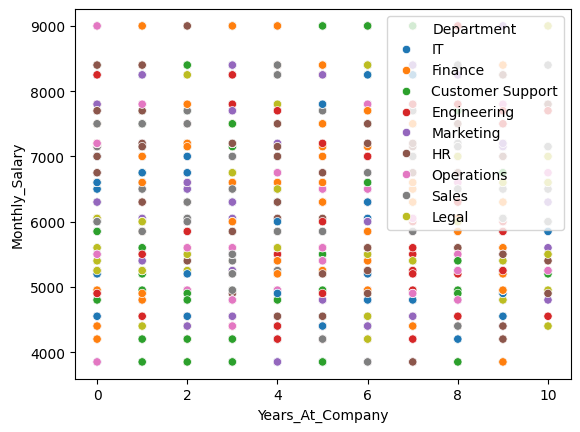

In [6]:

# Create a scatter plot with hue for department
sns.scatterplot(x='Years_At_Company', y='Monthly_Salary', hue='Department', data=EB_data)
plt.title('Monthly Salary vs. Years at Company by Department')
plt.xlabel('Years at Company')
plt.ylabel('Monthly Salary')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Month' column might be named differently, check column names:
print(EB_data.columns)

# If 'Month' column is named 'Month_of_Joining', adjust the code:
filtered_data = EB_data[(EB_data['Years_At_Company'] == 10) & (EB_data['Month_of_Joining'] == 1)]
# If differently named, replace 'Month_of_Joining' with the actual column name.

# Create a bar plot for salary comparison by department
sns.barplot(x='Department', y='Monthly_Salary', data=filtered_data)
plt.title('Monthly Salary of Employees with 10 Years Experience (Month 1)')
plt.xlabel('Department')
plt.ylabel('Monthly Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

# Calculate retention rate by department
retention_rate = EB_data.groupby('Department')['Years_At_Company'].mean()

# Create a bar plot for retention rate comparison
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x=retention_rate.index, y=retention_rate.values)
plt.title('Average Employee Retention by Department')
plt.xlabel('Department')
plt.ylabel('Average Years at Company')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('/content/sales_data.csv')

# Check for duplicate rows
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# If you want to identify the duplicate rows:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data = data.drop_duplicates()